# Phase 4 project

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

plt.style.use('ggplot')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
data = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [30]:
## First look at the data
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [31]:
# Change the column names so it can be more readable
data.columns = ['tweet', 'product', 'sentiment']

In [32]:
## Much cleaner
data.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [33]:
## Quick look at our target values
data.sentiment.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [34]:
## Change it so its now positive, negative or neutral
data['sentiment'].replace({'No emotion toward brand or product' : 'Neutral emotion', '''I can't tell''' : 'Neutral emotion'},
                         inplace=True)

In [35]:
data['sentiment'].value_counts()

Neutral emotion     5545
Positive emotion    2978
Negative emotion     570
Name: sentiment, dtype: int64

In [36]:
## Dropping all rows with Null values in it
data = data.dropna(axis=0)

In [37]:
## Reset index for aesthetics 
data.reset_index(drop=True, inplace=True)

In [38]:
data['product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: product, dtype: int64

In [41]:
data['product'].replace({'iPad' : 'Apple', 'iPad or iPhone App' : 'Apple', 'iPhone' : 'Apple',
                          'Other Apple product or service' : 'Apple', 'Other Google product or service' : 'Google',
                          'Android App': 'Google', 'Android' : 'Google'}, inplace=True)

In [43]:
data['product'].value_counts()

Apple     2409
Google     882
Name: product, dtype: int64

## Quick EDA

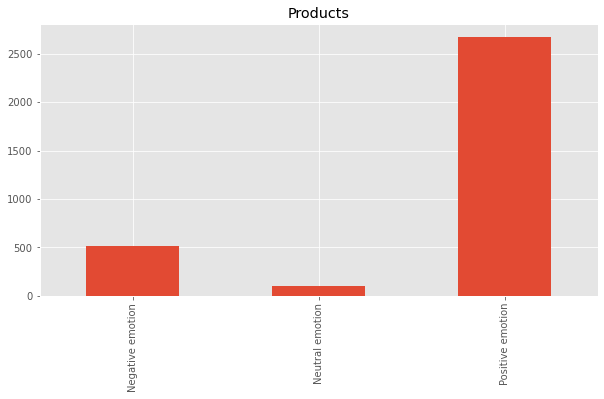

In [12]:
ax = data['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
         title = 'Products',
         figsize=(10,5))

Data is clearly biased towards positive emotion, something to keep in mind

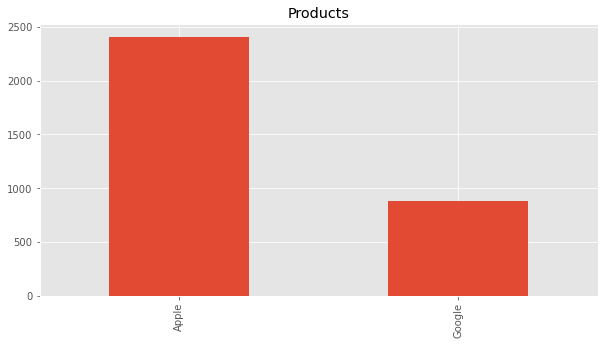

In [44]:
ax = data['product'].value_counts().sort_index() \
    .plot(kind='bar',
         title = 'Products',
         figsize=(10,5))

## Basic NLTK

In [45]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [46]:
def preprocess(tweet):
    tweet = tweet.lower()
    tweet = tokenizer.tokenize(tweet)
    tweet = [word for word in tweet if word not in stop_words]
    tweet = [stemmer.stem(word) for word in tweet]
    return ' '.join(tweet)

In [47]:
data['preprocessed_tweet'] = data['tweet'].apply(preprocess)

In [48]:
data

,tweet,product,sentiment,preprocessed_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion,wesley83 3g iphon 3 hr tweet rise_austin dead ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion,jessede know fludapp awesom ipad iphon app lik...
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion,swonderlin wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion,sxsw hope year festiv crashi year iphon app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...
3286,@mention your PR guy just convinced me to swit...,Apple,Positive emotion,mention pr guy convinc switch back iphon great...
3287,&quot;papyrus...sort of like the ipad&quot; - ...,Apple,Positive emotion,quot papyru sort like ipad quot nice lol sxsw ...
3288,Diller says Google TV &quot;might be run over ...,Google,Negative emotion,diller say googl tv quot might run playstat xb...
3289,I've always used Camera+ for my iPhone b/c it ...,Apple,Positive emotion,alway use camera iphon b c imag stabil mode su...


In [49]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['preprocessed_tweet'])

In [50]:
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)